In [1]:
import rdkit.Chem as rkc
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors, QED
from rdkit.Chem.QED import properties
import SA_Score.sascorer as sa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = r'D:\Research\A2B\training\validation\model60_vali_standrad.smi'    #read *.smi file
with open(filename,'r+') as load_smi:
    smi_li = load_smi.read().split('\n')

mols = [rkc.MolFromSmiles(smi) for smi in smi_li]

In [3]:
def QED_calculation(mol): #Calculate for QED score
    return QED.default(mol)

def SAscore_calculation(mol): #Calculate for SA score
    try:
        return sa.calculateScore(mol)
    except ZeroDivisionError:
            pass
def clogP(mol):
    return Crippen.MolLogP(mol)

In [4]:
qed_value,sascore,clogP = [QED_calculation(mol) for mol in mols],[SAscore_calculation(mol) for mol in mols],[clogP(mol) for mol in mols]

Text(0.5, 0, 'clogP')

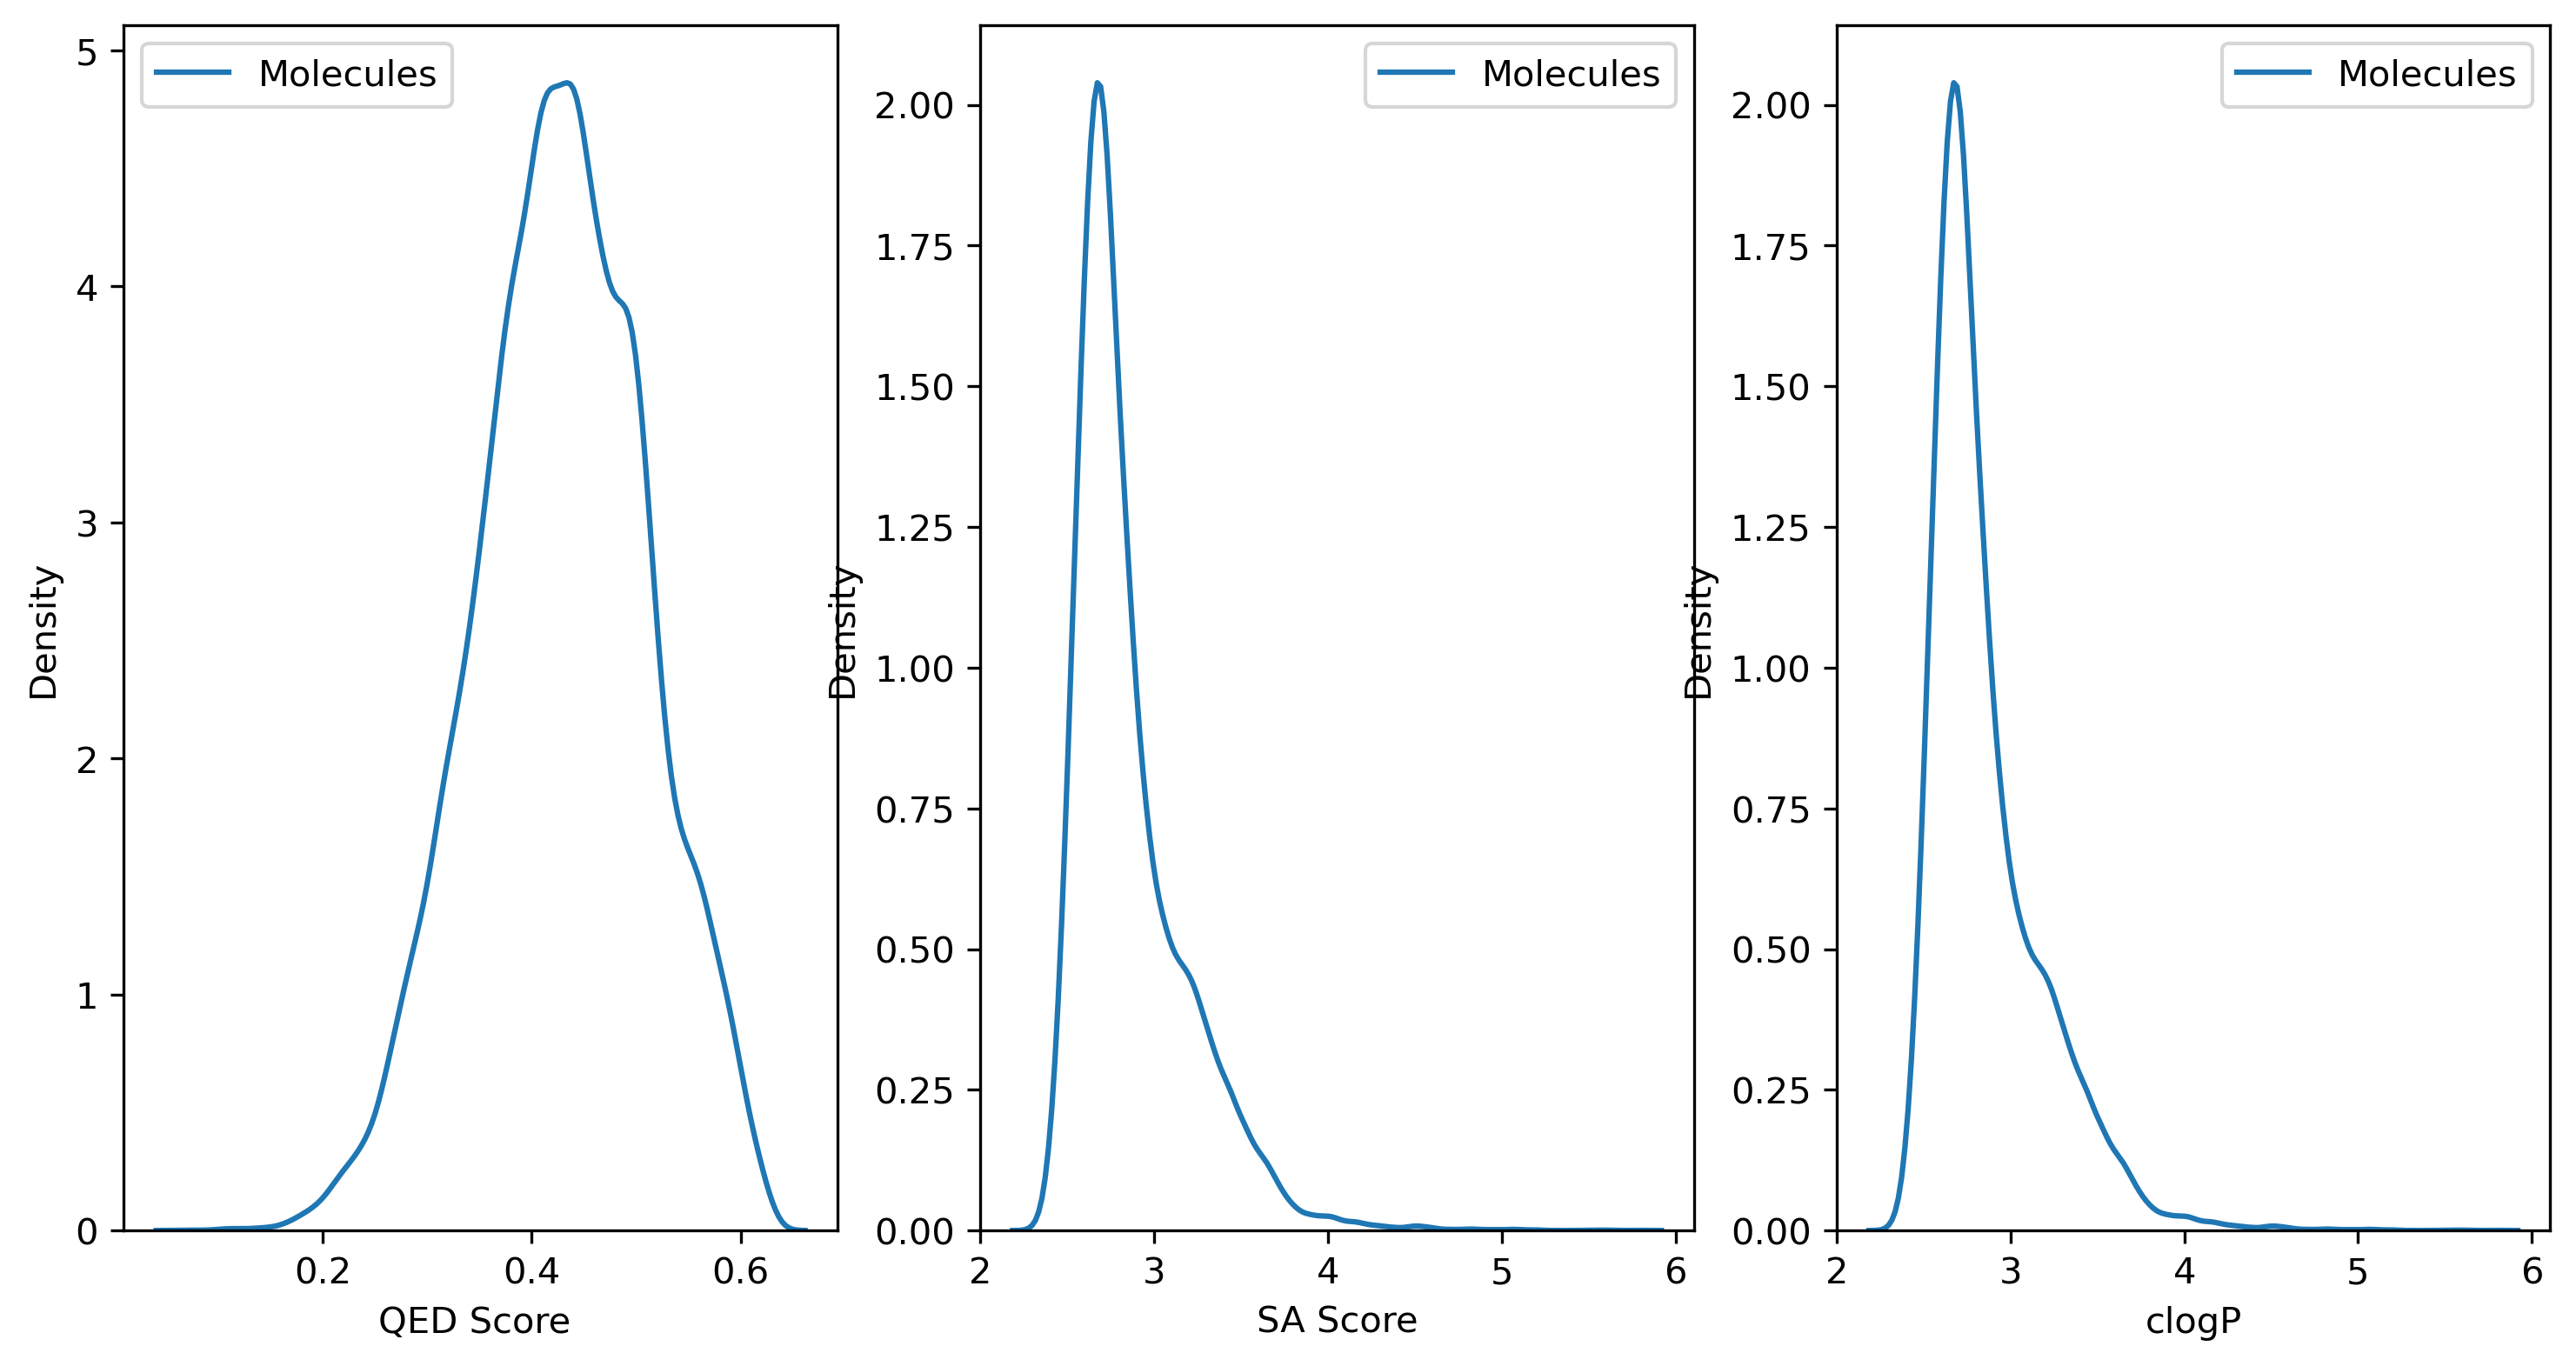

In [6]:
ig, axes = plt.subplots(1, 3,figsize=(12,6),dpi=300)

plt.subplot(1,3,1)
sns.kdeplot(qed_value)
plt.legend(loc='best',labels=['Molecules'])
plt.xlabel("QED Score ")

plt.subplot(1,3,2)
sns.kdeplot(sascore)
plt.legend(loc='best',labels=['Molecules'])
plt.xlabel("SA Score")

plt.subplot(1,3,3)
sns.kdeplot(sascore)
plt.legend(loc='best',labels=['Molecules'])
plt.xlabel("clogP")